In [9]:
import pandas as pd
import numpy as np
from glob import glob

# 당진_석문면

In [4]:
d = pd.read_csv("../external_data/train_data/dangjin_2015/석문면_3시간기온_201501_201512.csv")

In [62]:
def preprocessing(path_list, y):
    # 데이터 불러오기
    data_year_temperature = pd.read_csv(path_list[0])
    data_year_humidity = pd.read_csv(path_list[1])
    data_year_windspeed = pd.read_csv(path_list[2])
    data_year_winddirection = pd.read_csv(path_list[3])
    data_year_cloud = pd.read_csv(path_list[4])
    
    # 데이터 결합
    data_year = data_year_temperature[[' format: day', 'hour', 'forecast']]
    data_year['Temperature'] = data_year_temperature[data_year_temperature.columns[-1]]
    data_year['Humidity'] = data_year_humidity[data_year_humidity.columns[-1]]
    data_year['WindSpeed'] = data_year_windspeed[data_year_windspeed.columns[-1]]
    data_year['WindDirection'] = data_year_winddirection[data_year_winddirection.columns[-1]]
    data_year['Cloud'] = data_year_cloud[data_year_cloud.columns[-1]]
    
    # 월 구분 행 추출
    month_rows = [-1]
    month_rows.extend(data_year[data_year['hour'].isna()].index)
    month_rows.append(data_year.shape[0]+1)
    
    # 월별 데이터 분리
    month_data = []
    for i in range(len(month_rows)-1):
        month_data.append(data_year.loc[month_rows[i]+1:month_rows[i+1]-1])
    
    # 예보 시간 생성 및 데이터 결합
    data_fcst_concat = pd.DataFrame(columns=['Forecast time', 'forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud'])
    for i, df in enumerate(month_data):
        #if y==20
        if path_list[0][-17:-11]=='201604':
            month = i+4
        else:
            month = i+1
        year = y
#         if month == 13:
#             month = 1
#             year += 1
#         elif month == 14:
#             month = 2
#             year += 1

        date = f'{year}-{month}-' + df[' format: day'].str.split(' ').str[-1] + ' ' + (df['hour'].astype(int)//100).astype(str) + ':00'
        
        # 시간단위 UTC => GMT
        date = pd.to_datetime(date) + pd.DateOffset(hours=9)

        data_fcst = pd.DataFrame(columns=['Forecast time', 'forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud'])
        data_fcst['Forecast time'] = date
        data_fcst[['forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']] = df[['forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

        data_fcst_concat = pd.concat([data_fcst_concat, data_fcst])
        
    return data_fcst_concat

In [47]:
dangjin_data_path = '../external_data/train_data/dangjin'

csv_list = sorted(glob(dangjin_data_path+'/*/*.csv'))

In [50]:
csv_list

['../external_data/train_data/dangjin\\dangjin_2015\\석문면_3시간기온_201501_201512.csv',
 '../external_data/train_data/dangjin\\dangjin_2015\\석문면_습도_201501_201512.csv',
 '../external_data/train_data/dangjin\\dangjin_2015\\석문면_풍속_201501_201512.csv',
 '../external_data/train_data/dangjin\\dangjin_2015\\석문면_풍향_201501_201512.csv',
 '../external_data/train_data/dangjin\\dangjin_2015\\석문면_하늘상태_201501_201512.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_01_03\\석문면_3시간기온_201601_201603.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_01_03\\석문면_습도_201601_201603.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_01_03\\석문면_풍속_201601_201603.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_01_03\\석문면_풍향_201601_201603.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_01_03\\석문면_하늘상태_201601_201603.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_04_12\\석문면_3시간기온_201604_201612.csv',
 '../external_data/train_data/dangjin\\dangjin_2016_04_12\\석문면_습도_20160

In [63]:
fcst_data = pd.DataFrame(columns=['Forecast time', 'forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud'])
y_range = [2015, 2016, 2016, 2017, 2018]
for i in range(5):
    fcst_data = pd.concat([fcst_data, preprocessing(csv_list[i*5:i*5+5], y_range[i])])

In [64]:
fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2015-01-01 11:00:00,4.0,-2.4,45.0,10.7,321.0,3.0
1,2015-01-01 11:00:00,7.0,-3.0,50.0,10.5,322.0,3.0
2,2015-01-01 11:00:00,10.0,-4.7,60.0,10.6,321.0,3.0
3,2015-01-01 11:00:00,13.0,-4.9,64.0,10.6,313.0,3.0
4,2015-01-01 11:00:00,16.0,-5.8,69.0,9.5,317.0,3.0
...,...,...,...,...,...,...,...
8728,2018-03-01 08:00:00,52.0,9.0,70.0,3.1,130.0,2.0
8729,2018-03-01 08:00:00,55.0,12.0,65.0,1.3,184.0,3.0
8730,2018-03-01 08:00:00,58.0,11.0,80.0,1.3,135.0,3.0
8731,2018-03-01 08:00:00,61.0,9.0,85.0,1.4,155.0,3.0


In [65]:
fcst_data.to_csv('dangjin_previous_fcst_data.csv', index=False)

# 울산_선암동

In [72]:
dangjin_data_path = '../external_data/train_data/ulsan'

csv_list = sorted(glob(dangjin_data_path+'/*/*.csv'))

In [73]:
csv_list

['../external_data/train_data/ulsan\\ulsan_2015\\선암동_3시간기온_201501_201512.csv',
 '../external_data/train_data/ulsan\\ulsan_2015\\선암동_습도_201501_201512.csv',
 '../external_data/train_data/ulsan\\ulsan_2015\\선암동_풍속_201501_201512.csv',
 '../external_data/train_data/ulsan\\ulsan_2015\\선암동_풍향_201501_201512.csv',
 '../external_data/train_data/ulsan\\ulsan_2015\\선암동_하늘상태_201501_201512.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_01_03\\선암동_3시간기온_201601_201603.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_01_03\\선암동_습도_201601_201603.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_01_03\\선암동_풍속_201601_201603.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_01_03\\선암동_풍향_201601_201603.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_01_03\\선암동_하늘상태_201601_201603.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_04_12\\선암동_3시간기온_201604_201612.csv',
 '../external_data/train_data/ulsan\\ulsan_2016_04_12\\선암동_습도_201604_201612.csv',
 '../external_data/train_data/uls

In [75]:
fcst_data = pd.DataFrame(columns=['Forecast time', 'forecast', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud'])
y_range = [2015, 2016, 2016, 2017, 2018]
for i in range(5):
    fcst_data = pd.concat([fcst_data, preprocessing(csv_list[i*5:i*5+5], y_range[i])])

In [76]:
fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2015-01-01 11:00:00,4.0,1.4,21.0,8.8,303.0,1.0
1,2015-01-01 11:00:00,7.0,-0.8,29.0,5.9,295.0,1.0
2,2015-01-01 11:00:00,10.0,-3.0,39.0,5.9,296.0,1.0
3,2015-01-01 11:00:00,13.0,-4.2,46.0,5.2,290.0,1.0
4,2015-01-01 11:00:00,16.0,-5.4,51.0,4.2,295.0,2.0
...,...,...,...,...,...,...,...
8728,2018-03-01 08:00:00,52.0,13.0,50.0,2.9,172.0,2.0
8729,2018-03-01 08:00:00,55.0,14.0,60.0,3.2,167.0,3.0
8730,2018-03-01 08:00:00,58.0,12.0,70.0,2.6,178.0,3.0
8731,2018-03-01 08:00:00,61.0,11.0,75.0,2.0,200.0,3.0


In [77]:
fcst_data.to_csv('ulsan_previous_fcst_data.csv', index=False)

# basic_preprocessing

In [131]:
dangjin_obs_data = pd.read_csv('dangjin_previous_obs_data.csv', encoding='ANSI')

In [132]:
ulsan_obs_data = pd.read_csv('ulsan_previous_obs_data.csv', encoding='ANSI')

In [133]:
# drop & re-order
dangjin_obs_data = dangjin_obs_data.loc[:,['일시','기온(°C)','습도(%)','풍속(m/s)','풍향(16방위)','전운량(10분위)']]
ulsan_obs_data = ulsan_obs_data.loc[:,['일시','기온(°C)','습도(%)','풍속(m/s)','풍향(16방위)','전운량(10분위)']]

In [134]:
# change column names
new_column_names = list(dangjin_fcst_data.columns)
new_column_names.remove('forecast')
new_column_names

dangjin_obs_data.columns = new_column_names
ulsan_obs_data.columns = new_column_names
dangjin_obs_data

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2015-01-01 0:00,NaN,NaN,5.3,340.0,NaN
1,2015-01-01 1:00,-4.4,47.0,5.4,340.0,6.0
2,2015-01-01 2:00,-4.6,50.0,4.9,340.0,NaN
3,2015-01-01 3:00,-4.7,50.0,6.2,320.0,6.0
4,2015-01-01 4:00,-5.0,56.0,5.0,320.0,6.0
...,...,...,...,...,...,...
27684,2018-02-28 19:00,5.1,91.0,6.7,50.0,NaN
27685,2018-02-28 20:00,5.1,90.0,4.7,20.0,NaN
27686,2018-02-28 21:00,2.3,96.0,6.1,20.0,NaN
27687,2018-02-28 22:00,2.3,97.0,4.5,20.0,NaN


In [135]:
# convert dtype to pd.datetime 
dangjin_fcst_data['Forecast time'] = pd.to_datetime(dangjin_fcst_data['Forecast time'])
dangjin_obs_data['Forecast time'] = pd.to_datetime(dangjin_obs_data['Forecast time'])
ulsan_fcst_data['Forecast time'] = pd.to_datetime(ulsan_fcst_data['Forecast time'])
ulsan_obs_data['Forecast time'] = pd.to_datetime(ulsan_obs_data['Forecast time'])

In [136]:
# calculate
def to_date(x):
    return pd.DateOffset(hours=x)

dangjin_fcst_data['time'] = dangjin_fcst_data['Forecast time'] + dangjin_fcst_data['forecast'].map(to_date)
ulsan_fcst_data['time'] = ulsan_fcst_data['Forecast time'] + ulsan_fcst_data['forecast'].map(to_date)

C:\Users\dongi\anaconda3\envs\dacon\lib\site-packages\pandas\core\arrays\datetimelike.py:1108: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


In [137]:
# drop the 'forecast' column
dangjin_fcst_data = dangjin_fcst_data.drop('forecast', axis=1)
ulsan_fcst_data = ulsan_fcst_data.drop('forecast', axis=1)

In [138]:
dangjin_fcst_data

,Forecast time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,time
0,2015-01-01 11:00:00,-2.4,45.0,10.7,321.0,3.0,2015-01-01 15:00:00
1,2015-01-01 11:00:00,-3.0,50.0,10.5,322.0,3.0,2015-01-01 18:00:00
2,2015-01-01 11:00:00,-4.7,60.0,10.6,321.0,3.0,2015-01-01 21:00:00
3,2015-01-01 11:00:00,-4.9,64.0,10.6,313.0,3.0,2015-01-02 00:00:00
4,2015-01-01 11:00:00,-5.8,69.0,9.5,317.0,3.0,2015-01-02 03:00:00
...,...,...,...,...,...,...,...
169434,2018-03-01 08:00:00,9.0,70.0,3.1,130.0,2.0,2018-03-03 12:00:00
169435,2018-03-01 08:00:00,12.0,65.0,1.3,184.0,3.0,2018-03-03 15:00:00
169436,2018-03-01 08:00:00,11.0,80.0,1.3,135.0,3.0,2018-03-03 18:00:00
169437,2018-03-01 08:00:00,9.0,85.0,1.4,155.0,3.0,2018-03-03 21:00:00


In [139]:
# re-order
new_col_order = ['time', 'Forecast time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']

dangjin_fcst_data = dangjin_fcst_data.loc[:,new_col_order]
ulsan_fcst_data = ulsan_fcst_data.loc[:,new_col_order]

In [140]:
dangjin_obs_data = dangjin_obs_data.rename(columns={'Forecast time':'time'})
ulsan_obs_data = ulsan_obs_data.rename(columns={'Forecast time':'time'})

In [141]:
def preprocess_wind(data):
    '''
    data: pd.DataFrmae which contains the columns 'WindSpeed' and 'WindDirection'
    '''

    # degree to radian
    wind_direction_radian = data['WindDirection'] * np.pi / 180

    # polar coordinate to cartesian coordinate
    wind_x = data['WindSpeed'] * np.cos(wind_direction_radian)
    wind_y = data['WindDirection'] * np.sin(wind_direction_radian)

    # name pd.series
    wind_x.name = 'Wind_X'
    wind_y.name = 'Wind_Y'

    return wind_x, wind_y

In [142]:
# join 'Wind_X' and 'Wind_Y'
dangjin_fcst_data = dangjin_fcst_data.join(preprocess_wind(dangjin_fcst_data))
dangjin_obs_data = dangjin_obs_data.join(preprocess_wind(dangjin_obs_data))
ulsan_fcst_data = ulsan_fcst_data.join(preprocess_wind(ulsan_fcst_data))
ulsan_obs_data = ulsan_obs_data.join(preprocess_wind(ulsan_obs_data))

# drop 'WindSpeed' and 'WindDirection'
dangjin_fcst_data.drop(columns = ['WindSpeed','WindDirection'], inplace=True)
dangjin_obs_data.drop(columns = ['WindSpeed','WindDirection'], inplace=True)
ulsan_fcst_data.drop(columns = ['WindSpeed','WindDirection'], inplace=True)
ulsan_obs_data.drop(columns = ['WindSpeed','WindDirection'], inplace=True)


# Energy

In [144]:
import pickle

In [318]:
with open('energy_dj_extenral.pkl','rb') as f:
    dangjin_energy = pickle.load(f)
with open('energy_uls_external.pkl','rb') as f:
    ulsan_energy = pickle.load(f)

In [150]:
dangjin_energy

,dangjin,dangjin_floating,dangjin_warehouse
time,,,
2015-01-01 01:00:00,0,0.0,0.0
2015-01-01 02:00:00,0,0.0,0.0
2015-01-01 03:00:00,0,0.0,0.0
2015-01-01 04:00:00,0,0.0,0.0
2015-01-01 05:00:00,0,0.0,0.0
...,...,...,...
2018-03-01 19:00:00,0,11.0,2.0
2018-03-01 20:00:00,0,0.0,0.0
2018-03-01 21:00:00,0,0.0,0.0


In [154]:
ulsan_energy

,ulsan
time,
2015-01-01 01:00:00,0
2015-01-01 02:00:00,0
2015-01-01 03:00:00,0
2015-01-01 04:00:00,0
2015-01-01 05:00:00,0
...,...
2018-03-01 19:00:00,0
2018-03-01 20:00:00,0
2018-03-01 21:00:00,0


In [319]:
energy = pd.DataFrame(columns=['time'])
energy['time'] = pd.date_range(start='2015-01-01 01:00:00', end='2018-03-01 23:00:00', freq='H')
energy = pd.merge(dangjin_energy,ulsan_energy, on=['time'], how='outer')

In [180]:
energy.index[-73:]

DatetimeIndex(['2018-03-01 23:00:00', '2015-12-11 01:00:00',
               '2015-12-11 02:00:00', '2015-12-11 03:00:00',
               '2015-12-11 04:00:00', '2015-12-11 05:00:00',
               '2015-12-11 06:00:00', '2015-12-11 07:00:00',
               '2015-12-11 08:00:00', '2015-12-11 09:00:00',
               '2015-12-11 10:00:00', '2015-12-11 11:00:00',
               '2015-12-11 12:00:00', '2015-12-11 13:00:00',
               '2015-12-11 14:00:00', '2015-12-11 15:00:00',
               '2015-12-11 16:00:00', '2015-12-11 17:00:00',
               '2015-12-11 18:00:00', '2015-12-11 19:00:00',
               '2015-12-11 20:00:00', '2015-12-11 21:00:00',
               '2015-12-11 22:00:00', '2015-12-11 23:00:00',
               '2015-12-12 00:00:00', '2015-12-12 01:00:00',
               '2015-12-12 02:00:00', '2015-12-12 03:00:00',
               '2015-12-12 04:00:00', '2015-12-12 05:00:00',
               '2015-12-12 06:00:00', '2015-12-12 07:00:00',
               '2015-12-

마지막 72개 row가 merge 과정에서 떨어짐. (ulsan에만 존재)

In [190]:
np.where(energy.index == '2015-12-11 00:00:00')

(array([8255], dtype=int64),)

In [320]:
energy = energy.sort_index()

In [214]:
energy.index[-73:]

DatetimeIndex(['2018-02-26 23:00:00', '2018-02-27 00:00:00',
               '2018-02-27 01:00:00', '2018-02-27 02:00:00',
               '2018-02-27 03:00:00', '2018-02-27 04:00:00',
               '2018-02-27 05:00:00', '2018-02-27 06:00:00',
               '2018-02-27 07:00:00', '2018-02-27 08:00:00',
               '2018-02-27 09:00:00', '2018-02-27 10:00:00',
               '2018-02-27 11:00:00', '2018-02-27 12:00:00',
               '2018-02-27 13:00:00', '2018-02-27 14:00:00',
               '2018-02-27 15:00:00', '2018-02-27 16:00:00',
               '2018-02-27 17:00:00', '2018-02-27 18:00:00',
               '2018-02-27 19:00:00', '2018-02-27 20:00:00',
               '2018-02-27 21:00:00', '2018-02-27 22:00:00',
               '2018-02-27 23:00:00', '2018-02-28 00:00:00',
               '2018-02-28 01:00:00', '2018-02-28 02:00:00',
               '2018-02-28 03:00:00', '2018-02-28 04:00:00',
               '2018-02-28 05:00:00', '2018-02-28 06:00:00',
               '2018-02-

In [321]:
energy = energy.reset_index()

# 원본 데이터셋(2018.02~)과 통합

In [281]:
dangjin_fcst = dangjin_fcst_data
dangjin_obs = dangjin_obs_data
ulsan_fcst = ulsan_fcst_data
ulsan_obs = ulsan_obs_data

In [274]:
with open('../witt_preprocessing/pickles/basic/dangjin_fcst_data.pkl','rb') as f:
    dangjin_dangjin_fcst_data = pickle.load(f)
with open('../witt_preprocessing/pickles/basic/dangjin_obs_data.pkl','rb') as f:
    dangjin_dangjin_obs_data = pickle.load(f)
with open('../witt_preprocessing/pickles/basic/ulsan_fcst_data.pkl','rb') as f:
    ulsan_ulsan_fcst_data = pickle.load(f)
with open('../witt_preprocessing/pickles/basic/ulsan_obs_data.pkl','rb') as f:
    ulsan_ulsan_obs_data = pickle.load(f)

In [282]:
dangjin_fcst = dangjin_fcst.append(dangjin_dangjin_fcst_data, ignore_index=True)
dangjin_obs = dangjin_obs.append(dangjin_dangjin_obs_data, ignore_index=True)
ulsan_fcst = ulsan_fcst.append(ulsan_ulsan_fcst_data, ignore_index=True)
ulsan_obs = ulsan_obs.append(ulsan_ulsan_obs_data, ignore_index=True)

In [284]:
energy_energy = pd.read_csv("../original_dataset/energy.csv")
energy_energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [286]:
def to_datetime_for_energy(date_str):
    if date_str[11:13] == '24':
        date_str = date_str[0:11] + '00' + date_str[13:]
        return pd.to_datetime(date_str) + pd.Timedelta(1, unit='days')

    else:
        return pd.to_datetime(date_str)

In [287]:
energy_energy['time'] = energy_energy['time'].apply(to_datetime_for_energy)

In [322]:
energy_energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 01:00:00,0.0,0.0,0,0
1,2018-03-01 02:00:00,0.0,0.0,0,0
2,2018-03-01 03:00:00,0.0,0.0,0,0
3,2018-03-01 04:00:00,0.0,0.0,0,0
4,2018-03-01 05:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [323]:
energy = energy.append(energy_energy, ignore_index=True)

In [324]:
energy

,time,dangjin,dangjin_floating,dangjin_warehouse,ulsan
0,2015-01-01 01:00:00,0.0,0.0,0.0,0.0
1,2015-01-01 02:00:00,0.0,0.0,0.0,0.0
2,2015-01-01 03:00:00,0.0,0.0,0.0,0.0
3,2015-01-01 04:00:00,0.0,0.0,0.0,0.0
4,2015-01-01 05:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
53370,2021-01-31 20:00:00,0.0,0.0,0.0,0.0
53371,2021-01-31 21:00:00,0.0,0.0,0.0,0.0
53372,2021-01-31 22:00:00,0.0,0.0,0.0,0.0
53373,2021-01-31 23:00:00,0.0,0.0,0.0,0.0


# advanced_preprocessing

In [291]:
def merge_to_recent(data, time, due_hour = 21):
    '''
    @warning
    data에 'Forecast time'(기상 예측이 이루어진 시점) column이 존재해야 함.

    @description
    fcst에서 'time'이 중복되는 row들을 하나로 통합한다.
    이때, 가장 최근의 fcst data로 통합한다. (즉, 가장 최근의 fcst data 이외의 row는 모두 삭제한다.)
    '가장 최근'이라는 것은, 해당 'time'의 전날의 due_hour까지다. 
    예를 들어 2021-05-02 14:00:00(=time)를 예측하고, due_hour = 21이라면,
    2021-05-01 21:00:00 전까지의 row 중 가장 최근의 fcst로 통합한다.

    @parameters
    data: pd.DataFrame ; 통합이 이루어질 dataframe
    time: pd.Timestamp ; 통합하려는 time
    due_hour: int ; description 참고

    @return
    pd.Series ; 통합된 하나의 row

    '''
    # data only with the given time
    data_only_with_time = data.loc[data['time'] == time]
    
    # shift time
    time = time - pd.Timedelta(1, unit='days') # shifting 1 day to the past (yesterday)
    time = time.replace(hour=due_hour) # change 'hour' to DUE_HOUR

    # most recent forecast
    return data_only_with_time[data_only_with_time['Forecast time'] <= time].iloc[-1:,]

In [292]:
# apply merge_to_recent (dangjin_fcst)

# create a new merged df
dangjin_fcst_unique_recent = pd.DataFrame()

for time in dangjin_fcst['time'].unique():
    to_append = merge_to_recent(dangjin_fcst, time)
    dangjin_fcst_unique_recent = dangjin_fcst_unique_recent.append(to_append)

# reset index and drop 'Forecast time'
dangjin_fcst_unique_recent =  dangjin_fcst_unique_recent.reset_index(drop=True)
dangjin_fcst_unique_recent =  dangjin_fcst_unique_recent.drop('Forecast time', axis=1)
dangjin_fcst_unique_recent

,time,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2015-01-02 00:00:00,-5.9,62.0,3.0,3.093161,-219.512045
1,2015-01-02 03:00:00,-5.7,68.0,3.0,3.884969,-155.864559
2,2015-01-02 06:00:00,-5.6,84.0,4.0,2.196985,-18.683936
3,2015-01-02 09:00:00,-4.8,74.0,4.0,1.739740,35.670952
4,2015-01-02 12:00:00,-1.9,60.0,4.0,2.898233,-12.494020
...,...,...,...,...,...,...
17957,2021-03-03 12:00:00,7.0,40.0,1.0,-3.176148,-22.789567
17958,2021-03-03 15:00:00,8.0,40.0,1.0,-3.593860,-130.593860
17959,2021-03-03 18:00:00,5.0,55.0,1.0,-1.905256,-105.000000
17960,2021-03-03 21:00:00,1.0,80.0,1.0,-1.826397,45.204526


In [293]:
# apply merge_to_recent (ulsan_fcst)

# create a new merged df
ulsan_fcst_unique_recent = pd.DataFrame()

for time in dangjin_fcst['time'].unique():
    to_append = merge_to_recent(ulsan_fcst, time)
    ulsan_fcst_unique_recent = ulsan_fcst_unique_recent.append(to_append)

# reset index and drop 'Forecast time'
ulsan_fcst_unique_recent =  ulsan_fcst_unique_recent.reset_index(drop=True)
ulsan_fcst_unique_recent =  ulsan_fcst_unique_recent.drop('Forecast time', axis=1)
ulsan_fcst_unique_recent

,time,Temperature,Humidity,Cloud,Wind_X,Wind_Y
0,2015-01-02 00:00:00,-4.1,41.0,1.0,2.617972,-261.511292
1,2015-01-02 03:00:00,-5.1,46.0,1.0,1.479164,-267.360797
2,2015-01-02 06:00:00,-5.3,47.0,2.0,1.328486,-269.707922
3,2015-01-02 09:00:00,-3.6,42.0,2.0,0.076791,-270.958725
4,2015-01-02 12:00:00,1.8,27.0,2.0,1.761397,-273.904277
...,...,...,...,...,...,...
17957,2021-03-03 12:00:00,9.0,45.0,3.0,0.377795,82.381331
17958,2021-03-03 15:00:00,9.0,45.0,3.0,-1.075104,103.627427
17959,2021-03-03 18:00:00,8.0,55.0,3.0,-1.165822,103.461868
17960,2021-03-03 21:00:00,6.0,65.0,3.0,-0.590453,98.866955


In [294]:
# get dictionary to convert from cloud_fcst to cloud_obs

# merge (note that this is not the 'real' merged data)
dangjin_merged_for_cloud = pd.merge(dangjin_fcst_unique_recent, dangjin_obs, on='time', suffixes=('_fcst','_obs'))
ulsan_merged_for_cloud = pd.merge(ulsan_fcst_unique_recent, ulsan_obs, on='time', suffixes=('_fcst','_obs'))

# mean
def cloud_from_fcst_to_obs(data):
    '''
    @parameter
    data: pd.DataFrame; data should contain both 'Cloud_fcst' and 'Cloud_obs'

    @return
    dictionary ; its key is the value of 'Cloud_fcst', its value is the value of 'Cloud_obs'
    '''

    # dropna
    data.dropna(inplace=True)
    # unique cloud_fcsts
    cloud_fcsts = data['Cloud_fcst'].unique()
    # dict to convert from fcst to obs
    convert = {cloud_fcst:0 for cloud_fcst in cloud_fcsts}

    # mean
    for cloud_fcst in cloud_fcsts:
        sliced_df = data[data['Cloud_fcst'] == cloud_fcst]
        convert[cloud_fcst] = sliced_df['Cloud_obs'].mean()

    return convert

dangjin_convert_cloud = cloud_from_fcst_to_obs(dangjin_merged_for_cloud)
ulsan_convert_cloud = cloud_from_fcst_to_obs(ulsan_merged_for_cloud)
dangjin_convert_cloud, ulsan_convert_cloud

({3.0: 6.077930582842174,
  4.0: 8.203878265553461,
  2.0: 3.5244648318042815,
  1.0: 2.3085852478839177},
 {1.0: 1.4317699285852152,
  2.0: 3.2948972829688534,
  3.0: 5.973024236037935,
  4.0: 8.687258687258687})

In [295]:
# apply the convert-dictionary
dangjin_fcst_unique_recent['Cloud'].replace(dangjin_convert_cloud, inplace=True)
ulsan_fcst_unique_recent['Cloud'].replace(ulsan_convert_cloud, inplace=True)
display(dangjin_fcst_unique_recent['Cloud'])
display(ulsan_fcst_unique_recent['Cloud'])

0        6.077931
1        6.077931
2        8.203878
3        8.203878
4        8.203878
           ...   
17957    2.308585
17958    2.308585
17959    2.308585
17960    2.308585
17961    2.308585
Name: Cloud, Length: 17962, dtype: float64

0        1.431770
1        1.431770
2        3.294897
3        3.294897
4        3.294897
           ...   
17957    5.973024
17958    5.973024
17959    5.973024
17960    5.973024
17961    5.973024
Name: Cloud, Length: 17962, dtype: float64

In [296]:
# index of interpolated df
strt_time = dangjin_fcst_unique_recent['time'].iloc[0]
end_time = dangjin_fcst_unique_recent['time'].iloc[-1]
date_range = pd.date_range(strt_time, end_time, freq='H')

In [297]:
# interpolate

## empty df
dangjin_fcst_interpolated = pd.DataFrame(index=date_range)
ulsan_fcst_interpolated = pd.DataFrame(index=date_range)

## join empty df with original df
dangjin_fcst_unique_recent_ = dangjin_fcst_unique_recent.set_index('time')
dangjin_fcst_interpolated = dangjin_fcst_interpolated.join(dangjin_fcst_unique_recent_)

ulsan_fcst_unique_recent_ = ulsan_fcst_unique_recent.set_index('time')
ulsan_fcst_interpolated = ulsan_fcst_interpolated.join(ulsan_fcst_unique_recent_)

## interpolate (linear > quadratic)
dangjin_fcst_interpolated.interpolate(method='linear', inplace=True, axis=0)
ulsan_fcst_interpolated.interpolate(method='linear', inplace=True, axis=0)

In [298]:
# reset index and add index as 'time' column
dangjin_fcst_interpolated.reset_index(inplace=True)
ulsan_fcst_interpolated.reset_index(inplace=True)

dangjin_fcst_interpolated['time'] = dangjin_fcst_interpolated['index']
dangjin_fcst_interpolated.drop(columns='index', inplace=True)

ulsan_fcst_interpolated['time'] = ulsan_fcst_interpolated['index']
ulsan_fcst_interpolated.drop(columns='index', inplace=True)

In [299]:
# obs not need interpolation, but for code simplciity
dangjin_obs_interpolated = dangjin_obs
ulsan_obs_interpolated = ulsan_obs

In [300]:
# count na
print(dangjin_fcst_interpolated.isna().sum())
print(ulsan_fcst_interpolated.isna().sum())
print(dangjin_obs_interpolated.isna().sum())
print(ulsan_obs_interpolated.isna().sum())

Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
time           0
dtype: int64
Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
time           0
dtype: int64
time               0
Temperature       40
Humidity          41
Cloud          12376
Wind_X            90
Wind_Y            90
dtype: int64
time              0
Temperature       6
Humidity          4
Cloud          7172
Wind_X           96
Wind_Y           96
dtype: int64


(array([1314., 1067., 1163., 1163., 2112., 5187.,   98.,   98.,   51.,
         123.]),
 array([16436.        , 16653.55416667, 16871.10833333, 17088.6625    ,
        17306.21666667, 17523.77083333, 17741.325     , 17958.87916667,
        18176.43333333, 18393.9875    , 18611.54166667]),
 <BarContainer object of 10 artists>)

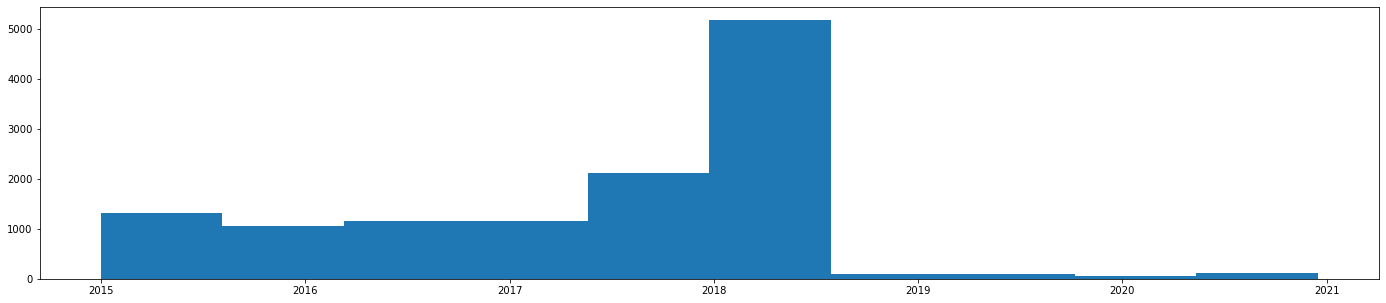

In [301]:
import matplotlib.pyplot as plt
# hist
dj_cloud_na = dangjin_obs_interpolated[dangjin_obs_interpolated['Cloud'].isna()]
plt.figure(figsize=(24,5))
plt.hist(dj_cloud_na['time'])

(array([1311., 1111., 1103., 1167., 1194., 1147.,   96.,   14.,    6.,
          23.]),
 array([16436.        , 16651.18333333, 16866.36666667, 17081.55      ,
        17296.73333333, 17511.91666667, 17727.1       , 17942.28333333,
        18157.46666667, 18372.65      , 18587.83333333]),
 <BarContainer object of 10 artists>)

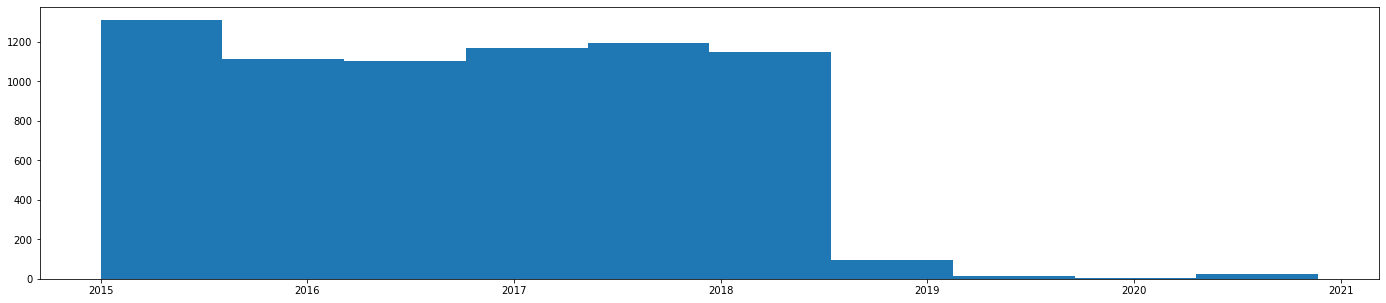

In [302]:
uls_cloud_na = ulsan_obs_interpolated[ulsan_obs_interpolated['Cloud'].isna()]
plt.figure(figsize=(24,5))
plt.hist(uls_cloud_na['time'])

In [303]:
# obs는 2015-01-01 00:00:00 부터, fcst는 2015-01-02 00:00:00 부터이므로 fcst에 기준
dangjin_obs_interpolated = dangjin_obs_interpolated[dangjin_obs_interpolated.time >= '2015-01-02 00:00:00'].reset_index(drop=True)
ulsan_obs_interpolated = ulsan_obs_interpolated[ulsan_obs_interpolated.time >= '2015-01-02 00:00:00'].reset_index(drop=True)

In [304]:
# obs fill based on 'time' from fcst
dangjin_obs_filled = dangjin_obs_interpolated.set_index('time').fillna(dangjin_fcst_interpolated.set_index('time')).reset_index()
ulsan_obs_filled = ulsan_obs_interpolated.set_index('time').fillna(ulsan_fcst_interpolated.set_index('time')).reset_index()

In [305]:
# fcst data (for code)
dangjin_fcst_filled = dangjin_fcst_interpolated
ulsan_fcst_filled = ulsan_fcst_interpolated

In [306]:
print(dangjin_fcst_filled.isna().sum())
print(ulsan_fcst_filled.isna().sum())
print(dangjin_obs_filled.isna().sum())
print(ulsan_obs_filled.isna().sum())

Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
time           0
dtype: int64
Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
time           0
dtype: int64
time           0
Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
dtype: int64
time           0
Temperature    0
Humidity       0
Cloud          0
Wind_X         0
Wind_Y         0
dtype: int64


# energy N/A processing

In [325]:
energy = energy[energy.time >= '2015-01-02 00:00:00'].reset_index(drop=True)
energy

,time,dangjin,dangjin_floating,dangjin_warehouse,ulsan
0,2015-01-02 00:00:00,0.0,0.0,0.0,0.0
1,2015-01-02 01:00:00,0.0,0.0,0.0,NaN
2,2015-01-02 02:00:00,0.0,0.0,0.0,NaN
3,2015-01-02 03:00:00,0.0,0.0,0.0,NaN
4,2015-01-02 04:00:00,0.0,0.0,0.0,NaN
...,...,...,...,...,...
53347,2021-01-31 20:00:00,0.0,0.0,0.0,0.0
53348,2021-01-31 21:00:00,0.0,0.0,0.0,0.0
53349,2021-01-31 22:00:00,0.0,0.0,0.0,0.0
53350,2021-01-31 23:00:00,0.0,0.0,0.0,0.0


In [326]:
energy.isna().sum()

time                    0
dangjin                72
dangjin_floating       96
dangjin_warehouse     120
ulsan                1488
dtype: int64

- dangjin : **72개**
    - 2015-12-11 01:00:00   ~   2015-12-14 00:00:00 ( 72개)
- dangjin_floating : **96개**
    - 2015-12-11 01:00:00   ~   2015-12-14 00:00:00 ( 72개)
    - 2020-06-26 01:00:00   ~   2020-06-27 00:00:00 ( 24개)
- dangjin_warehouse : **120개**
    - 2015-12-11 01:00:00   ~   2015-12-14 00:00:00 ( 72개)
    - 2018-03-17 01:00:00   ~   2018-03-19 00:00:00 ( 48개)
- ulsan : **1488개**
    - 2015-01-02 01:00:00   ~   2015-02-01 00:00:00 (720개)
    - 2015-04-23 01:00:00   ~   2015-05-01 00:00:00 (192개)
    - 2015-07-27 01:00:00   ~   2015-07-28 00:00:00 ( 24개)
    - 2015-10-29 01:00:00   ~   2015-11-01 00:00:00 ( 72개)
    - 2016-11-08 01:00:00   ~   2016-11-09 00:00:00 ( 24개)
    - 2017-02-28 01:00:00   ~   2017-03-01 00:00:00 ( 24개)
    - 2017-03-09 01:00:00   ~   2017-03-15 00:00:00 (144개)
    - 2017-07-03 01:00:00   ~   2017-07-05 00:00:00 ( 48개)
    - 2017-07-06 01:00:00   ~   2017-07-07 00:00:00 ( 24개)
    - 2017-07-23 01:00:00   ~   2017-08-01 00:00:00 (216개)

# 2015-12-11 ~ 2015-12-13 당진 NA는 ulsan에 기반,
# 나머지 dangjin_floating, dangjin_warehouse의 NA는 dangjin에 기반

In [ ]:
[8233:8305]

In [390]:
energy[8233:8280], energy[8280:8305]

(                    time  dangjin  dangjin_floating  dangjin_warehouse  ulsan
 8233 2015-12-11 01:00:00      NaN               NaN                NaN    0.0
 8234 2015-12-11 02:00:00      NaN               NaN                NaN    0.0
 8235 2015-12-11 03:00:00      NaN               NaN                NaN    0.0
 8236 2015-12-11 04:00:00      NaN               NaN                NaN    0.0
 8237 2015-12-11 05:00:00      NaN               NaN                NaN    0.0
 8238 2015-12-11 06:00:00      NaN               NaN                NaN    0.0
 8239 2015-12-11 07:00:00      NaN               NaN                NaN    0.0
 8240 2015-12-11 08:00:00      NaN               NaN                NaN    0.0
 8241 2015-12-11 09:00:00      NaN               NaN                NaN    1.0
 8242 2015-12-11 10:00:00      NaN               NaN                NaN    7.0
 8243 2015-12-11 11:00:00      NaN               NaN                NaN    9.0
 8244 2015-12-11 12:00:00      NaN               NaN

In [411]:
# convert dangjin to dangjin_warehouse or dangjin_floating via 비율 of mean
energy_mean_series = energy.mean(axis=0)

dj_to_djwh = energy_mean_series['dangjin_warehouse'] / energy_mean_series['dangjin'] 
dj_to_djflt = energy_mean_series['dangjin_floating'] / energy_mean_series['dangjin']
uls_to_dj = energy.dangjin[energy.ulsan.notna()].mean() / energy.ulsan[energy.ulsan.notna()].mean()
uls_to_djwh = energy.dangjin_warehouse[energy.ulsan.notna()].mean() / energy.ulsan[energy.ulsan.notna()].mean()
uls_to_djflt = energy.dangjin_floating[energy.ulsan.notna()].mean() / energy.ulsan[energy.ulsan.notna()].mean()

dj_to_djwh, dj_to_djflt, uls_to_dj, uls_to_djwh, uls_to_djflt

<ipython-input-411-fa5850b44a93>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  energy_mean_series = energy.mean(axis=0)


(0.6791110424617399,
 0.8499639489177288,
 2.1144853168388202,
 1.436242009717222,
 1.799678832972728)

In [401]:
energy.dangjin[energy.ulsan.notna()].mean()

140.23146431881372

In [403]:
energy.dangjin_warehouse[energy.ulsan.notna()].mean()

95.25075371057514

In [404]:
energy.dangjin_floating[energy.ulsan.notna()].mean()

119.3536772478694

In [402]:
 energy.ulsan[energy.ulsan.notna()].mean()

66.31943159031313

In [414]:
# slice where data is na
na_dangjin = energy.loc[energy['dangjin'].isna()]
na_dangjin.loc[:,'dangjin'] = na_dangjin['ulsan'] * uls_to_dj
na_dangjin.loc[:,'dangjin_warehouse'] = na_dangjin['ulsan'] * uls_to_djwh
na_dangjin.loc[:,'dangjin_floating'] = na_dangjin['ulsan'] * uls_to_djflt

In [413]:
energy.isna().sum()

time                    0
dangjin                72
dangjin_floating       96
dangjin_warehouse     120
ulsan                1488
dtype: int64

In [415]:
na_dangjin_warehouse = energy.loc[energy['dangjin_warehouse'].isna()] # df where dangjin_warehouse = na
na_dangjin_warehouse.loc[:,'dangjin_warehouse'] = na_dangjin_warehouse['dangjin'] * dj_to_djwh

na_dangjin_floating = energy.loc[energy['dangjin_floating'].isna()] # df where dangjin_floating = na
na_dangjin_floating.loc[:,'dangjin_floating'] = na_dangjin_floating['dangjin'] * dj_to_djflt

In [418]:
# create filled df
energy_filled = energy.copy()

energy_filled[energy['dangjin'].isna()] = na_dangjin
energy_filled[energy_filled['dangjin_warehouse'].isna()] = na_dangjin_warehouse
energy_filled[energy_filled['dangjin_floating'].isna()] = na_dangjin_floating


energy_filled.isna().sum()

time                    0
dangjin                 0
dangjin_floating        0
dangjin_warehouse       0
ulsan                1488
dtype: int64

In [419]:
energy_filled.shape

(53352, 5)

# Drop potential nas (where 24 target values in one day are all zero) - energy

In [420]:
# There are days where all 24 target values are all zero.
# This should be interpreted as an error.
# Therefore, change all the 0 of the above situation to NA

target_list = ['dangjin','dangjin_floating', 'dangjin_warehouse', 'ulsan']
energy_is_zero_dict = {target:[] for target in target_list} # store indices where the whole day is zero
energy_is_zero = list()

for i in range(energy_filled.shape[0] // 24):
    idx = i*24    
    energy_sample = energy_filled.iloc[idx:idx+24]
    energy_sample_sum = energy_sample.sum(axis=0)

    for target in target_list:
        if energy_sample_sum[target] == 0:
            # save index(day)
            energy_is_zero_dict[target].append(i)
            energy_is_zero.append(i)

In [421]:
# drop those rows
energy_filled_dropped = energy_filled.copy()

for i in set(energy_is_zero):
    idx = i*24
    to_drop = [idx + n for n in range(24)]
    energy_filled_dropped.drop(index=to_drop, inplace=True)

## Merge fcst, obs, and energy
- inner merge on 'time'

In [422]:
print(dangjin_fcst_filled.shape)
print(dangjin_obs_filled.shape)
print(ulsan_fcst_filled.shape)
print(ulsan_obs_filled.shape)
print(energy_filled_dropped.shape)

(54073, 6)
(53291, 6)
(54073, 6)
(53326, 6)
(50664, 5)


In [425]:
ulsan_fcst_filled

,Temperature,Humidity,Cloud,Wind_X,Wind_Y,time
22609,24.000000,95.000000,5.973024,0.513377,43.153757,2017-08-01 01:00:00
22610,24.000000,95.000000,5.973024,0.704224,21.890464,2017-08-01 02:00:00
22611,24.000000,95.000000,5.973024,0.895070,0.627171,2017-08-01 03:00:00
22612,24.000000,95.000000,5.973024,0.722577,13.629595,2017-08-01 04:00:00
22613,24.000000,95.000000,5.973024,0.550085,26.632020,2017-08-01 05:00:00
...,...,...,...,...,...,...
54068,6.666667,61.666667,5.973024,-0.782243,100.398593,2021-03-03 20:00:00
54069,6.000000,65.000000,5.973024,-0.590453,98.866955,2021-03-03 21:00:00
54070,5.333333,70.000000,5.973024,-0.624698,57.189789,2021-03-03 22:00:00
54071,4.666667,75.000000,5.973024,-0.658943,15.512623,2021-03-03 23:00:00


In [426]:
energy_filled_dropped[energy_filled_dropped.time > '2017-08-01 00:00:00']

,time,dangjin,dangjin_floating,dangjin_warehouse,ulsan
22609,2017-08-01 01:00:00,0.0,0.0,0.0,0.0
22610,2017-08-01 02:00:00,0.0,0.0,0.0,0.0
22611,2017-08-01 03:00:00,0.0,0.0,0.0,0.0
22612,2017-08-01 04:00:00,0.0,0.0,0.0,0.0
22613,2017-08-01 05:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
53347,2021-01-31 20:00:00,0.0,0.0,0.0,0.0
53348,2021-01-31 21:00:00,0.0,0.0,0.0,0.0
53349,2021-01-31 22:00:00,0.0,0.0,0.0,0.0
53350,2021-01-31 23:00:00,0.0,0.0,0.0,0.0


In [427]:
dangjin_merged_ = pd.merge(dangjin_fcst_filled, dangjin_obs_filled, on='time', suffixes=('_fcst','_obs'))
dangjin_merged = pd.merge(dangjin_merged_, energy_filled_dropped.loc[:,['time','dangjin_floating','dangjin_warehouse','dangjin']], on='time')

# ulsan_time > '2017-08-01 00:00:00'
ulsan_merged_ = pd.merge(ulsan_fcst_filled[ulsan_fcst_filled.time > '2017-08-01 00:00:00'], ulsan_obs_filled[ulsan_obs_filled.time > '2017-08-01 00:00:00'], on='time', suffixes=('_fcst','_obs'))
ulsan_merged = pd.merge(ulsan_merged_, energy_filled_dropped[energy_filled_dropped.time > '2017-08-01 00:00:00'].loc[:,['time','ulsan']], on='time')

display(dangjin_merged)
display(ulsan_merged)

,Temperature_fcst,Humidity_fcst,Cloud_fcst,Wind_X_fcst,Wind_Y_fcst,time,Temperature_obs,Humidity_obs,Cloud_obs,Wind_X_obs,Wind_Y_obs,dangjin_floating,dangjin_warehouse,dangjin
0,-4.700000,73.000000,2.308585,3.477333,-89.292571,2015-02-01 00:00:00,-7.3,85.0,0.000000,0.205212,65.778483,0.0,0.0,0.0
1,-5.066667,73.000000,2.308585,3.165950,-83.646137,2015-02-01 01:00:00,-8.0,90.0,2.308585,0.200000,0.000000,0.0,0.0,0.0
2,-5.433333,73.000000,2.308585,2.854567,-77.999702,2015-02-01 02:00:00,-8.5,88.0,2.308585,0.100000,0.000000,0.0,0.0,0.0
3,-5.800000,73.000000,2.308585,2.543184,-72.353268,2015-02-01 03:00:00,-8.3,87.0,0.000000,0.300000,0.000000,0.0,0.0,0.0
4,-5.800000,72.666667,2.308585,2.336297,-79.841929,2015-02-01 04:00:00,-8.8,88.0,0.000000,0.300000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50621,6.000000,76.666667,8.203878,-3.521363,-3.549990,2021-01-31 19:00:00,6.7,75.0,8.000000,-1.409539,-68.404029,0.0,0.0,0.0
50622,6.000000,78.333333,8.203878,-3.668069,15.689587,2021-01-31 20:00:00,6.2,77.0,8.000000,-0.751754,-68.404029,0.0,0.0,0.0
50623,6.000000,80.000000,8.203878,-3.814776,34.929164,2021-01-31 21:00:00,5.3,82.0,8.000000,-0.449951,-176.190222,0.0,0.0,0.0
50624,6.333333,80.000000,8.203878,-4.538312,27.378489,2021-01-31 22:00:00,5.8,77.0,8.000000,-0.939693,-68.404029,0.0,0.0,0.0


,Temperature_fcst,Humidity_fcst,Cloud_fcst,Wind_X_fcst,Wind_Y_fcst,time,Temperature_obs,Humidity_obs,Cloud_obs,Wind_X_obs,Wind_Y_obs,ulsan
0,24.000000,95.000000,5.973024,0.513377,43.153757,2017-08-01 01:00:00,24.6,98.0,5.973024,0.500000,-8.817457e-14,0.0
1,24.000000,95.000000,5.973024,0.704224,21.890464,2017-08-01 02:00:00,24.7,98.0,5.973024,0.600000,-8.817457e-14,0.0
2,24.000000,95.000000,5.973024,0.895070,0.627171,2017-08-01 03:00:00,24.5,98.0,8.000000,0.600000,-8.817457e-14,0.0
3,24.000000,95.000000,5.973024,0.722577,13.629595,2017-08-01 04:00:00,24.6,98.0,8.000000,1.315570,-1.162868e+02,0.0
4,24.000000,95.000000,5.973024,0.550085,26.632020,2017-08-01 05:00:00,24.5,98.0,9.000000,0.995858,-2.056920e+02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29801,8.666667,60.000000,8.687259,-2.629993,-75.790243,2021-01-31 19:00:00,8.8,50.0,5.000000,-2.349232,-6.840403e+01,0.0
29802,8.333333,65.000000,8.687259,-2.787240,-90.395122,2021-01-31 20:00:00,8.7,49.0,1.000000,-3.664801,-6.840403e+01,0.0
29803,8.000000,70.000000,8.687259,-2.944486,-105.000000,2021-01-31 21:00:00,8.4,51.0,7.000000,-1.542690,-1.761902e+02,0.0
29804,9.000000,68.333333,8.687259,-3.476275,-86.823238,2021-01-31 22:00:00,9.4,51.0,8.000000,-2.121199,-1.761902e+02,0.0


# Add seasonality (day and year)

In [430]:
# function for day_of_year
def day_of_year(datetime): #pd.datetime
    return pd.Period(datetime, freq='D').dayofyear

print(dangjin_fcst_filled.iloc[0]['time'])
print(day_of_year(dangjin_fcst_filled.iloc[0]['time']))

2015-01-02 00:00:00
2


In [434]:
# function
def add_seasonality(df):
    new_df = df.copy()
    
    new_df['Day_cos'] = new_df['time'].apply(lambda x: np.cos(x.hour * (2 * np.pi) / 24))
    new_df['Day_sin'] = new_df['time'].apply(lambda x: np.sin(x.hour * (2 * np.pi) / 24))

    new_df['Year_cos'] = new_df['time'].apply(lambda x: np.cos(day_of_year(x) * (2 * np.pi) / 365))
    new_df['Year_sin'] = new_df['time'].apply(lambda x: np.sin(day_of_year(x) * (2 * np.pi) / 365))

    return new_df

In [435]:
# apply
dangjin_merged_with_season = add_seasonality(dangjin_merged)
ulsan_merged_with_season = add_seasonality(ulsan_merged)

dangjin_fcst_with_season = add_seasonality(dangjin_fcst_filled)
ulsan_fcst_with_season = add_seasonality(ulsan_fcst_filled)
dangjin_obs_with_season = add_seasonality(dangjin_obs_filled)
ulsan_obs_with_season = add_seasonality(ulsan_obs_filled)

In [436]:
# check
print(dangjin_fcst_with_season.loc[4,['time','Day_cos','Day_sin','Year_cos','Year_sin']])
print(dangjin_fcst_with_season.loc[4 + 24,['time','Day_cos','Day_sin']])
print(dangjin_fcst_with_season.loc[4 + 24*365,['time','Year_cos','Year_sin']])

time        2015-01-02 04:00:00
Day_cos                     0.5
Day_sin                0.866025
Year_cos               0.999407
Year_sin               0.034422
Name: 4, dtype: object
time       2015-01-03 04:00:00
Day_cos                    0.5
Day_sin               0.866025
Name: 28, dtype: object
time        2016-01-02 04:00:00
Year_cos               0.999407
Year_sin               0.034422
Name: 8764, dtype: object


In [442]:
ulsan_fcst_with_season = ulsan_fcst_with_season[ulsan_fcst_with_season.time > '2017-08-01 00:00:00']
ulsan_obs_with_season = ulsan_obs_with_season[ulsan_obs_with_season.time > '2017-08-01 00:00:00']

In [444]:
with open('../witt_preprocessing/pickles/dangjin_merged.pkl','wb') as f:
    pickle.dump(dangjin_merged_with_season,f)
with open('../witt_preprocessing/pickles/ulsan_merged.pkl','wb') as f:
    pickle.dump(ulsan_merged_with_season,f)

with open('../witt_preprocessing/pickles/dangjin_fcst.pkl','wb') as f:
    pickle.dump(dangjin_fcst_with_season, f)
with open('../witt_preprocessing/pickles/dangjin_obs.pkl','wb') as f:
    pickle.dump(dangjin_obs_with_season, f)
with open('../witt_preprocessing/pickles/ulsan_fcst.pkl','wb') as f:
    pickle.dump(ulsan_fcst_with_season, f)
with open('../witt_preprocessing/pickles/ulsan_obs.pkl','wb') as f:
    pickle.dump(ulsan_obs_with_season, f)